# Análise Exploratória dos Dados
- Vamos começar analisando na base gerada na etapa anterior
- Vamos transformar nossos dados de forma que podemos utilizá-los no modelo

In [2]:
# Importando a base
import pandas as pd

df_teste = pd.read_csv("../dados/test_2.csv", keep_default_na=False)
df_treino = pd.read_csv("../dados/train_2.csv", keep_default_na=False)

In [3]:
# Visualizando o shape das bases
df_treino.shape, df_teste.shape

((1460, 81), (1459, 80))

In [4]:
# Podemos verificar novamente as informações dessa base
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# E também a quantidade de colunas de cada tipo
df_treino.dtypes.value_counts(), df_teste.dtypes.value_counts()

(object     43
 int64      35
 float64     3
 Name: count, dtype: int64,
 object     43
 int64      26
 float64    11
 Name: count, dtype: int64)

In [6]:
# Verificando a cardinalidade dos dados
df_treino.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

- Por mais que o Id tenha uma alta cardinalidade, não vamos eliminar esse valor pois vamos usar esse dado para fazer a submissão do nosso código

- **Vamos entender melhor a variável target (SalePrice)**

In [9]:
# Visualizando a descrição estatística
df_treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

A nossa coluna alvo possui uma dispersão relativamente alta, ela significa que os valores das casas variam 79442 para mais ou para menos. É possível notar também o salto que é dado do 3 quartil para o valor máximo, muito provavelmente essa coluna está cheia de outliers, vamos verificar!.

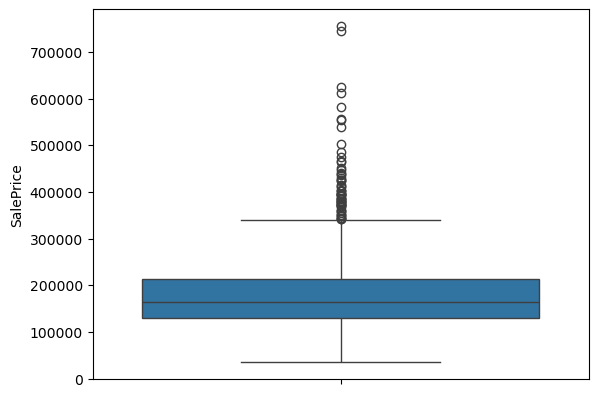

In [11]:
# Visualizando um boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_treino, y='SalePrice')
plt.show()

Posteriormente teremos que decidir o que faremos com esses outliers, não podemos simplesmente exclui-los, pois podem ser reais e realmente fazerem parte da características dos nossos dados.

- **Podemos avaliar diretamente a correlação das variáveis numéricas**

In [14]:
# Verificando a correlação entre os valores
df_treino.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.330222
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261354
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

- E visualizar graficamente
    - Vamos considerar as colunas OverallQual, BsmtHalfBath, KitchenAbvGr

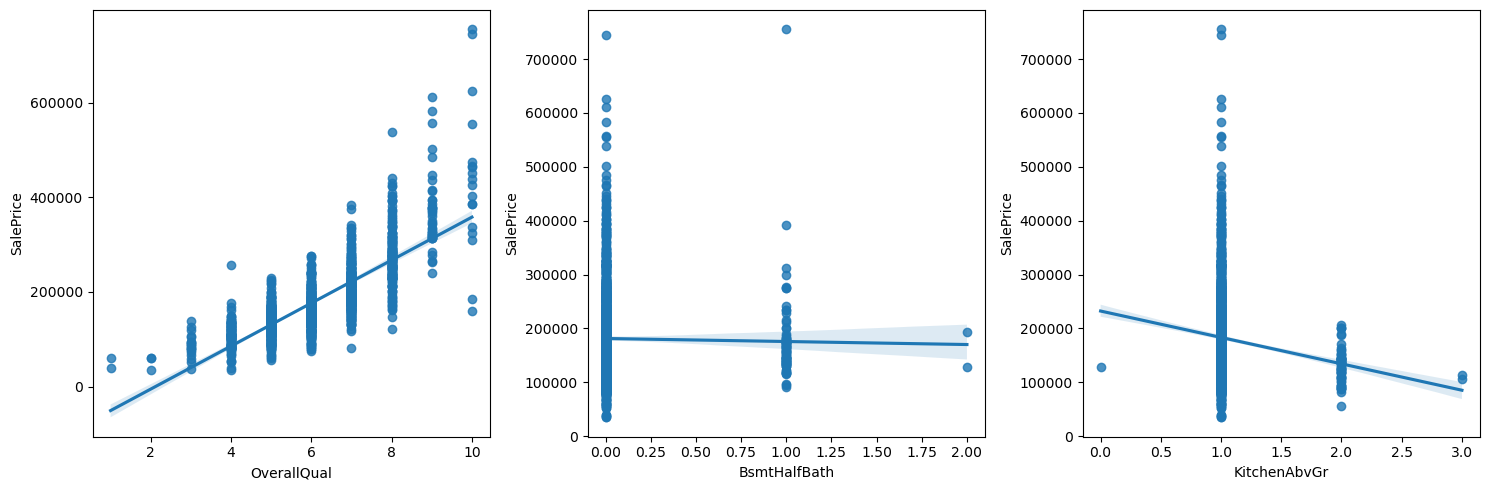

In [16]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3, tight_layout=True, figsize=(15,5))

sns.regplot(data=df_treino, x='OverallQual', y='SalePrice',ax=ax[0])
sns.regplot(data=df_treino, x='BsmtHalfBath', y='SalePrice', ax=ax[1])
sns.regplot(data=df_treino, x='KitchenAbvGr', y='SalePrice', ax=ax[2])
plt.show()

Estranhamente existe uma correlação negativa entre o número de cozinhas cima do solo(KitchenAbvGr) e o preço das casas(SalePrice), algumas explicações podem ser possíveis, como por exemplo, **Erro dos dados**, **Outliers presentes no dataset**, talvez exista outras variáveis que não estão sendo levadas em consideração na análise e que influênciam o preço da casa, como a coluna de **ano de construção**. Porém, o maior problema consiste no fato de que não temos informações detalhadas a respeito da coluna **KitchenAbvGr** no **dicionário de dados** que veio junto com os dados da competição, nesse caso qualquer tipo de suposição seria meramente especulativa.

- Podemos visualizar a correlação na forma de mapa de calor

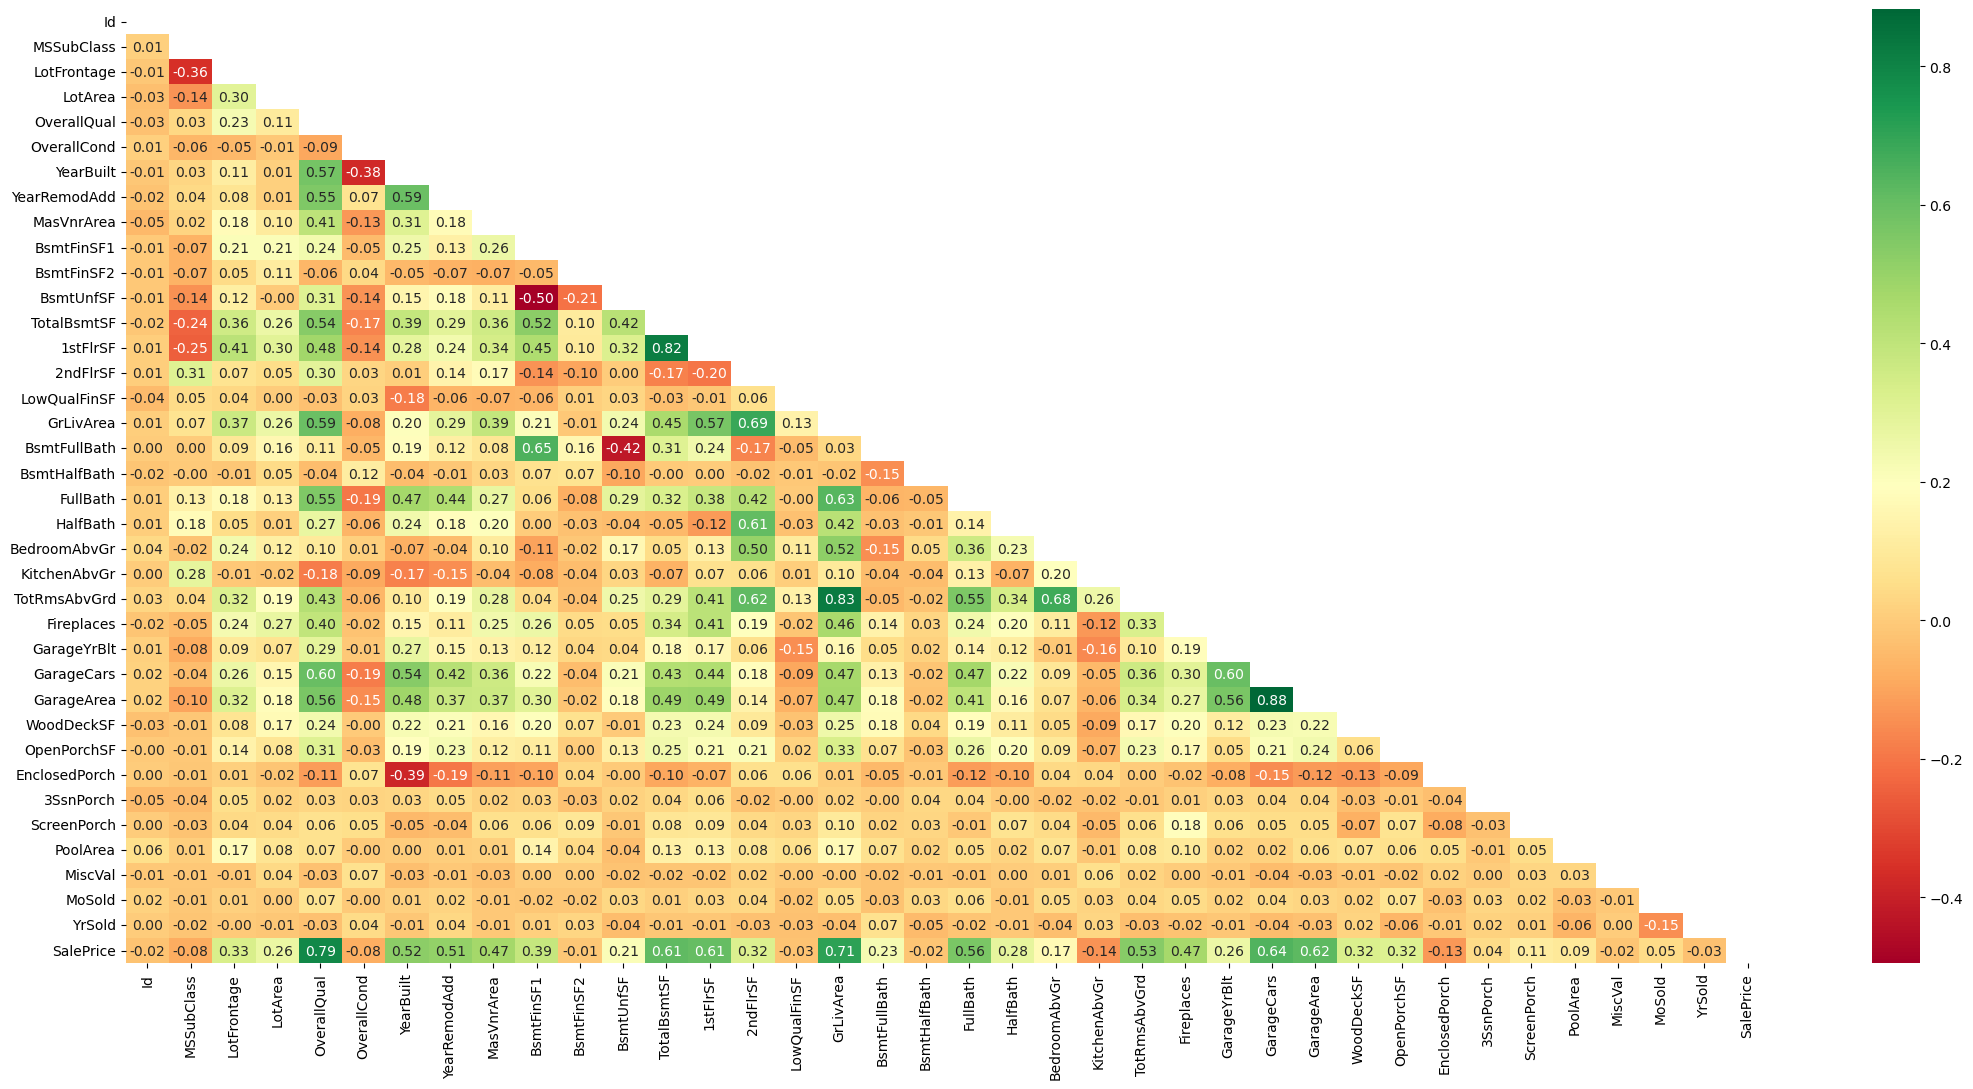

In [19]:
# Criando um mapa de calor da correlação
import numpy as np
matriz = np.triu(df_treino.corr(numeric_only=True))

fig, ax = plt.subplots(figsize=(22, 11))

sns.heatmap(df_treino.corr(numeric_only=True), mask=matriz, annot=True, fmt=".2f", cmap='RdYlGn')

plt.tight_layout()
plt.show()

- **E para as variáveis categóricas, podemos analisar se alguma delas possuem valores recorrentes**
    - Por exemplo, todas as casas "caras" possuem ar condicionado central e as casas "baratas" não

In [21]:
# Selecionando as colunas que vamos trabalhar
col_categoric = df_treino.columns[df_treino.dtypes == 'object']
col_categoric

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
# Visualizando as casas mais caras
casas_caras = df_treino.sort_values('SalePrice').tail(10)
casas_caras = casas_caras[col_categoric]
casas_caras

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial
769,RL,Pave,-1,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,WD,Normal
440,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,WD,Normal
1046,RL,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
803,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,RFn,TA,TA,Y,-1,-1,-1,New,Partial
898,RL,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial
1169,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,WD,Normal
1182,RL,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,-1,WD,Abnorml
691,RL,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,WD,Normal


In [23]:
# E também as casas mais baratas
casas_baratas = df_treino.sort_values('SalePrice').head(10)
casas_baratas = casas_baratas[col_categoric]
casas_baratas

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml
968,RM,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,-1,-1,-1,-1,Y,-1,GdWo,-1,WD,Abnorml
533,RL,Pave,-1,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,...,-1,-1,-1,-1,N,-1,-1,-1,WD,Normal
30,C (all),Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,...,Detchd,Unf,TA,Fa,N,-1,MnPrv,-1,WD,Normal
710,RL,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,-1,-1,-1,-1,N,-1,-1,-1,WD,Normal
1337,RM,Pave,Grvl,IR1,Bnk,AllPub,Corner,Mod,OldTown,Feedr,...,-1,-1,-1,-1,N,-1,-1,-1,WD,Normal
705,RM,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,-1,Othr,WD,Normal
1325,RM,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,MnPrv,-1,WD,Normal
812,C (all),Grvl,-1,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,...,Basment,Unf,TA,TA,N,-1,-1,Shed,WD,Alloca


In [24]:
# Verificando, das casas caras, valores que muito se repetem (muitos valores iguais)
caras_val = casas_caras.nunique()
caras_val.head(3)

MSZoning    1
Street      1
Alley       1
dtype: int64

In [25]:
# Verificando agora para as casas mais baratas
baratas_val = casas_baratas.nunique()
baratas_val.head(3)

MSZoning    3
Street      2
Alley       3
dtype: int64

In [26]:
# Podemos unir esses valores
rep = pd.concat([caras_val, baratas_val], axis=1).sort_values([0, 1]).head(10)
rep

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [27]:
rep.index

Index(['Utilities', 'Condition2', 'Street', 'Condition1', 'BldgType',
       'Heating', 'CentralAir', 'GarageQual', 'PavedDrive', 'MSZoning'],
      dtype='object')

In [28]:
# Agora visualizando essas colunas para as casas mais caras
casas_caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL


In [29]:
# E para as mais baratas
casas_baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all)
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all)
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all)
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all)


É possível observar que a coluna **Utilities** não faz muita diferença, os valores são os mesmos, tanto nas casas mais baratas, quanto nas casas mais caras. Mas, quando olhamos para a coluna de **PavesDrive**, para as casas caras a maioria do valor é **Y**, enquanto para as casas baratas a maioria dos valores é **N**, parece então que **PavesDrive** faz uma diferença significativa no **preço das casas**. Uma outra seria a coluna **CentralAir**, a maioria das casas que valem muito possuem ar condicionado central, já das casas baratas, 9 entre 10 não possuem. Dentro do contexto de negócio seria interessante passar essas informações para a equipe, com o objetivo de se questionar, se 'vale o investimento' de colocar um ar condicionado central e vender a casa um pouco mais cara, entre outras coisas podem ser recomendadas.

## Agora podemos investigar melhor essas principais colunas
- **Index:**
    - [Utilities](#Utilities)
    - [CentralAir](#CentralAir)
    - [PavedDrive](#PavedDrive)
    - [MSZoning](#MSZoning)
    - [GarageQual](#GarageQual)

<a id="Utilities"></a>
- <font color="blue">**Vamos começar primeiramente analisando a coluna "Utilities"**</font>

In [33]:
# Verificando os valores nessa coluna para a base de treino
df_treino.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [34]:
# E para a base de teste
df_teste.Utilities.value_counts()

Utilities
AllPub    1459
Name: count, dtype: int64

Essa é uma coluna que praticamente só possui um único valor, tanto na base de treino quanto na de teste, isso significa que ela não ajudará em nada o modelo, parece fazer sentido exclui-la.

In [36]:
# Eliminando essa coluna nas 2 bases
df_treino = df_treino.drop('Utilities', axis=1)
df_teste = df_teste.drop('Utilities', axis=1)

<a id="CentralAir"></a>
- <font color="blue">**Analisando a coluna "CentralAir"**</font>

In [38]:
# Verificando os valores nessa coluna
df_treino.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

Estamos trabalhando apenas com uma "foto" do nosso dataframe, manipulando especificamente as 10 casas mais caras, e as 10 casas mais baratas, estamos "podando o mato alto", ou seja, focando naquilo que é mais fácil de trabalhar e que nos dará grandes resultados posteriormente. Pode ser que depois nós nos aprofundaremos em relação a essa coluna, ou outras.

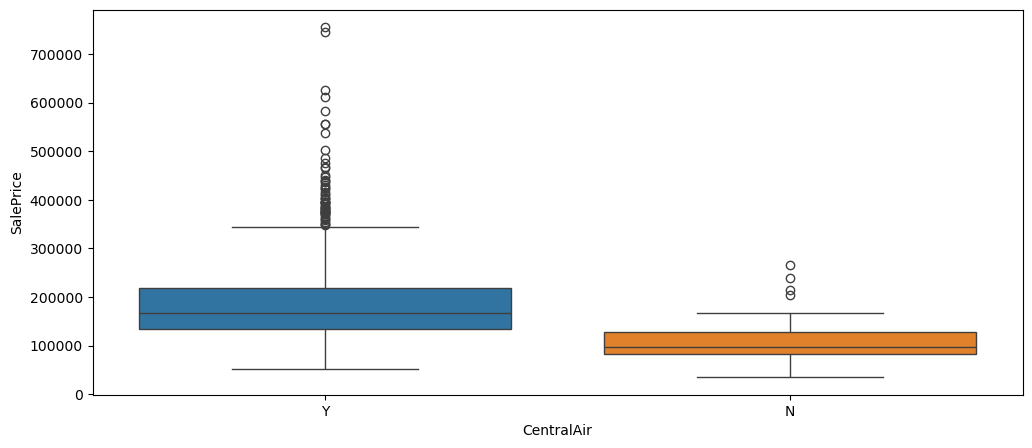

In [40]:
# Visualizando a relação com o preço
fig, axs = plt.subplots(figsize=(12, 5))

sns.boxplot(x=df_treino.CentralAir, y=df_treino.SalePrice, hue=df_treino.CentralAir)

plt.show()

- O valor "N", apesar de aparecer na maioria das casas de menor valor, não é um valor tão frequente

- **Podemos transformar essa coluna simplesmente colocando tudo que for Y como 1 e N como 0**

In [43]:
# Substituindo os valores
df_treino['CentralAir'] = df_treino.CentralAir.apply(lambda x: 1 if x == "Y" else 0)

In [44]:
# Verificando o resultado
df_treino.CentralAir.value_counts()

CentralAir
1    1365
0      95
Name: count, dtype: int64

- Fazendo o mesmo para a **<font color='blue'>base de teste</font>**

In [46]:
# Aplicando a função na base de teste
df_teste['CentralAir'] = df_teste['CentralAir'].apply(lambda x: 1 if x == "Y" else 0)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="PavedDrive"></a>
- <font color="blue">**E também analisar a coluna "PavedDrive"** (calçada pavimentada)</font>
    - Y: Paved 
    - P: Partial Pavement
    - N: Dirt/Gravel

In [49]:
# Verificando os valores nessa coluna
df_treino.PavedDrive.value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

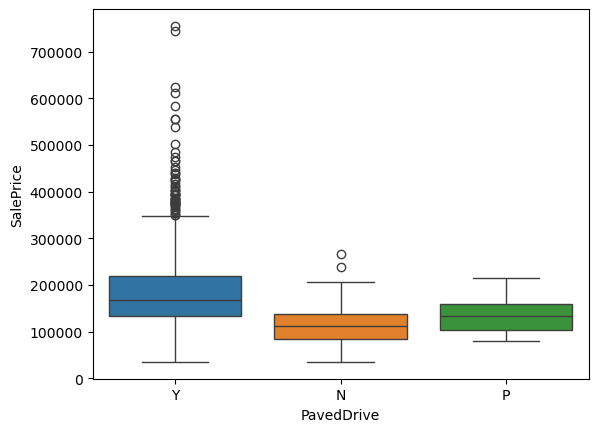

In [50]:
# Verificando a relação desses valores com o preço da casa
sns.boxplot(x=df_treino.PavedDrive, y=df_treino.SalePrice, hue=df_treino.PavedDrive)

plt.show()

Não é possível analisar a relação entre SalePrice e PavedDrive sem primeiro tranformar a coluna PavedDrive em numérica.

- **Podemos criar uma função capaz de transformar esses valores de texto em números**

In [53]:
# Criando a função
def DefinePavedDrive(x):
    if x == 'Y': 
        return 1
    elif x == 'N': 
        return 0 
    elif x == 'P': 
        return 0.5
    else:
        return -1

In [54]:
# Aplicando essa função
df_treino['PavedDrive'] = df_treino.PavedDrive.apply(DefinePavedDrive)

In [55]:
# Verificando o resultado
df_treino.PavedDrive.value_counts()

PavedDrive
1.0    1340
0.0      90
0.5      30
Name: count, dtype: int64

- E para a **<font color='blue'>base de teste</font>**

In [57]:
# Fazendo para a base de teste
df_teste['PavedDrive'] = df_teste.PavedDrive.apply(DefinePavedDrive)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="MSZoning"></a>
- <font color="blue">**Agora podemos entender a relação do "MSZoning" com o preço**</font>

In [60]:
# Fazendo um groupby desses dados para ver a média
# df_treino.MSZoning.value_counts()
df_treino.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False)

MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

In [61]:
# Visualizando também mínimo, máximo e contagem
df_treino.groupby('MSZoning')['SalePrice'].agg(['mean', 'min', 'max', 'count']).sort_values('count', ascending=False)

,mean,min,max,count
MSZoning,,,,
RL,191004.994787,39300,755000,1151
RM,126316.830275,37900,475000,218
FV,214014.061538,144152,370878,65
RH,131558.375000,76000,200000,16
C (all),74528.000000,34900,133900,10


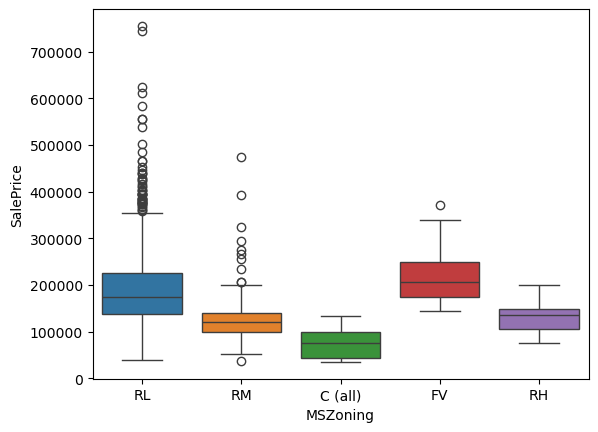

In [62]:
# Podemos inclusive visualizar a distribuição desses valores
sns.boxplot(x=df_treino.MSZoning, y=df_treino.SalePrice, hue=df_treino.MSZoning)

plt.show()

- **Para resolver o problema de variáveis textuais, podemos utilizar agora o OneHotEncoder e transformar cada um desses valores em uma nova coluna**
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [64]:
# Importando
from sklearn.preprocessing import OneHotEncoder

In [65]:
# Criando o encoder para essa coluna
enc_mszoning = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

In [66]:
# Fazendo o fit com os dados
enc_mszoning.fit(df_treino[['MSZoning']])

OneHotEncoder(drop='if_binary', handle_unknown='ignore')

In [67]:
# Transformando os dados
enc_mszoning.transform(df_treino[['MSZoning']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [68]:
# Podemos transformar isso em um DataFrame do pandas
ohe_df_Zoning = pd.DataFrame(
    enc_mszoning.transform(df_treino[['MSZoning']]).toarray(), 
    columns=enc_mszoning.get_feature_names_out()
)

ohe_df_Zoning

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0


In [69]:
# Unindo essa coluna com a base
df_treino = pd.concat([df_treino, ohe_df_Zoning], axis=1)

df_treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,Inside,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,FR2,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,Inside,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,Corner,...,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,FR2,...,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0


In [70]:
# Eliminando a coluna "MSZoning"
df_treino = df_treino.drop('MSZoning', axis=1)

- Agora utilizando o mesmo encoder para a **<font color='blue'>base de teste</font>**

In [72]:
# Fazendo a transformação
enc_mszoning.transform(df_teste[['MSZoning']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [73]:
# Transformando em um DataFrame (podemos sobrescrever essa variável)
ohe_df_Zoning = pd.DataFrame(
    enc_mszoning.transform(df_teste[['MSZoning']]).toarray(), 
    columns=enc_mszoning.get_feature_names_out()
)

ohe_df_Zoning

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,1.0
1455,0.0,0.0,0.0,0.0,1.0
1456,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0


In [74]:
# Unindo essa coluna com a base de teste
df_teste = pd.concat([df_teste, ohe_df_Zoning], axis=1)

In [75]:
# Verificando o resultado
df_teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,20,RH,80.0,11622,Pave,-1,Reg,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,1.0,0.0,0.0
1,1462,20,RL,81.0,14267,Pave,-1,IR1,Lvl,Corner,...,12500,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
2,1463,60,RL,74.0,13830,Pave,-1,IR1,Lvl,Inside,...,0,3,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
3,1464,60,RL,78.0,9978,Pave,-1,IR1,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
4,1465,120,RL,43.0,5005,Pave,-1,IR1,HLS,Inside,...,0,1,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0


In [76]:
# Eliminando a coluna "MSZoning"
df_teste = df_teste.drop('MSZoning', axis=1)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="GarageQual"></a>
- <font color="blue">**Analisando as informações sobre garagem, começando pela "GarageQual"**</font>
    - Ex: Excellent
    - Gd: Good
    - TA: Typical/Average
    - Fa: Fair
    - Po: Poor
    - NA: No Garage -> lembrando que já substituimos esse valor por -1

In [79]:
# Verificando os valores nessa coluna
df_treino.GarageQual.value_counts()

GarageQual
TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

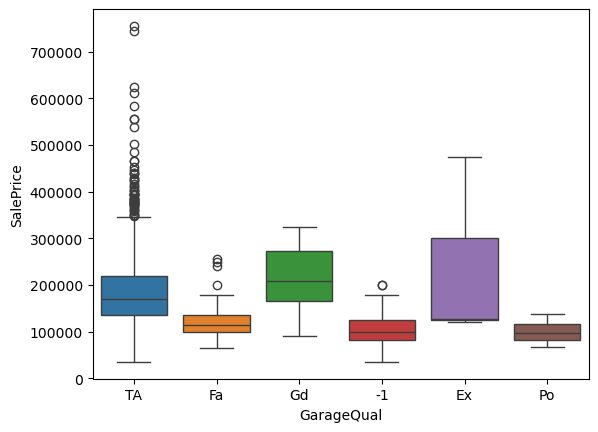

In [80]:
# Visualizando graficamente
sns.boxplot(x=df_treino.GarageQual, y=df_treino.SalePrice, hue=df_treino.GarageQual)

plt.show()

- **Ao ir no arquivo data_description, percebemos que existem várias colunas de garagem (também percebemos isso na etapa de Data Cleaning), então podemos visualizar essas informações**

In [82]:
# Verificando as colunas que possuem garagem no nome
col_garagem = df_treino.columns[df_treino.columns.str.contains('Garage')]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [83]:
# Visualizando os valores nessa base
df_treino[col_garagem].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [84]:
# Fazendo o value_counts
df_treino[['GarageQual', 'GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
Name: count, dtype: int64

Observamos através desse 'value_counts' que muitos valores que são iguais nessas 2 colunas, além de que as duas colunas parecem apresentar as mesmas informações, ou seja, redundancia. Nosso objetivo é não confundir o modelo, dando mais importancia a essa coluna(dando mais peso a ela) do que ela realmente é; Então retirar uma delas não seria um problema tão grande na nossa base.

In [86]:
df_treino[df_treino.GarageQual == df_treino.GarageCond].shape[0] / df_treino.shape[0] * 100

95.95890410958904

Em 96% dos casos da nossa base, a Qualidade e a Condição das garagens são as mesmas

- **Podemos apagar a coluna "GarageCond" pois a informação nessa coluna diz basicamente a mesma coisa que a coluna "GarageQual"** 

In [89]:
# Apagando a coluna GarageCond
df_treino = df_treino.drop('GarageCond', axis=1)

- **Da mesma forma, também podemos analisar a relação entre "GarageCars" e "GarageArea"**

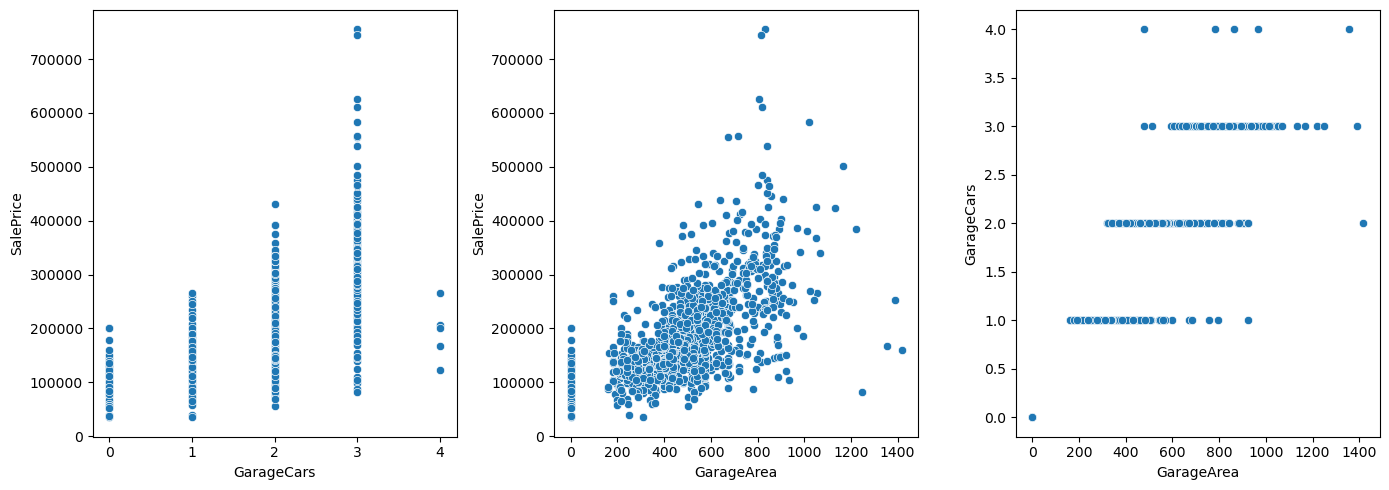

In [91]:
# Analisando a correlação entre as duas colunas
fig, ax = plt.subplots(ncols=3, figsize=(14, 5))
sns.scatterplot(data=df_treino, x='GarageCars', y='SalePrice', ax=ax[0])
sns.scatterplot(data=df_treino, x='GarageArea', y='SalePrice', ax=ax[1])
sns.scatterplot(data=df_treino, x='GarageArea', y='GarageCars', ax=ax[2])

plt.tight_layout()
plt.show()

In [92]:
# Avaliando correlação numericamente
df_treino[['GarageCars', 'GarageArea', 'SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


Analisando, é possível notar que as variáveis GarageCars e GarageArea então altamente correlacionadas, com uma correlação positiva de 88%; Esse tipo de situação pode confundir o nosso modelo fazendo com que ele, por exemplo, atribua pesos(coeficientes) instáveis a essas variáveis, pois a redundância que possuem acaba dificultando a interpretação individual delas, em relação ao o quanto elas individualmente afetam a variável alvo(SalePrice).
Poderiamos tentar resolver isso utilizando um método mais robusto como o PCA, mas como uma variável pode ser quase completamente explicada pela outra, com o objetivo de minimizar custo computacional e outros fatores, iremos simplesmente excluir umas das duas.

In [94]:
# Eliminando a coluna GarageArea
df_treino = df_treino.drop('GarageArea', axis=1)

In [95]:
# Verificando as colunas que possuem garagem no nome
df_treino.columns[df_treino.columns.str.contains('Garage')]

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual'],
      dtype='object')

- **Podemos continuar tratando as colunas de garagem, mas relacionando com outras informações da base como "YearBuilt" e "YearRemodAdd"**

In [97]:
# Analisando a correlação entre as datas de construção
df_treino.loc[df_treino.GarageYrBlt != -1, ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'SalePrice']].corr()

,YearBuilt,GarageYrBlt,YearRemodAdd,SalePrice
YearBuilt,1.000000,0.825667,0.618058,0.507584
GarageYrBlt,0.825667,1.000000,0.642277,0.486362
YearRemodAdd,0.618058,0.642277,1.000000,0.505434
SalePrice,0.507584,0.486362,0.505434,1.000000


Geralmente as garagens são construidas junto com as casas(no mesmo ano), existe uma correlação fortissima entre a coluna de Garagem e a coluna de Ano de Construção da Casa, mais uma vez um caso de redundância em nossos dados, iremos excluir a coluna de GarageYrBlt, pois ela possui uma correlação mais fraca com a variável alvo(SalePrice) do que a coluna de YearBuilt

In [99]:
# Também podemos eliminar essa coluna de GarageYrBlt
df_treino = df_treino.drop('GarageYrBlt', axis=1)

- **Por fim, podemos continuar tratando as colunas de garagem ou apenas transformar o restante das colunas de texto**
    - Utilizando o OneHotEncoder para a coluna "GarageType"
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    - E o OrdinalEncoder para as colunas "GarageFinish" e "GarageQual"
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [101]:
# Visualizando os valores em "GarageType"
df_treino.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
-1          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [102]:
# Criando um encoder para GarageType
enc_garagetype = OneHotEncoder(handle_unknown='ignore')

In [103]:
# Fazendo o fit
enc_garagetype.fit(df_treino[['GarageType']])

OneHotEncoder(handle_unknown='ignore')

In [104]:
# Categorias
enc_garagetype.categories_

[array(['-1', '2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort',
        'Detchd'], dtype=object)]

In [105]:
# Nomes resultantes das colunas
enc_garagetype.get_feature_names_out()

array(['GarageType_-1', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd'], dtype=object)

In [106]:
# Fazendo o transform já em um DataFrame
df_enc_garagetype = pd.DataFrame(
    enc_garagetype.transform(df_treino[['GarageType']]).toarray(), 
    columns=enc_garagetype.get_feature_names_out()
)

df_enc_garagetype

,GarageType_-1,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [107]:
# Unindo essa coluna com a base
df_treino = pd.concat([df_treino, df_enc_garagetype], axis=1)
df_treino

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,70,60.0,9550,Pave,-1,IR1,Lvl,Corner,Gtl,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,60,84.0,14260,Pave,-1,IR1,Lvl,FR2,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1456,1457,20,85.0,13175,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,1458,70,66.0,9042,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,1459,20,68.0,9717,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [108]:
# Eliminando a coluna "GarageType"
df_treino = df_treino.drop('GarageType', axis=1)

- Vamos fazer o OrdinalEncoder para as outras 2 colunas
    - GarageFinish: Interior finish of the garage
        - Fin: Finished
        - RFn: Rough Finished	
        - Unf: Unfinished
        - NA: No Garage -> usamos o -1
    - GarageQual: Garage quality
        - Ex: Excellent
        - Gd: Good
        - TA: Typical/Average
        - Fa: Fair
        - Po: Poor
        - NA: No Garage

In [110]:
# Criando a lista de ordem dos valores
categorie_garagefinish = ['Unf', 'RFn', 'Fin']
categorie_oe_garagequal = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [111]:
# Importando o OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [112]:
# Criando o encoder
oe = OrdinalEncoder(
    categories=[categorie_garagefinish, categorie_oe_garagequal], 
    handle_unknown='use_encoded_value', 
    unknown_value=-1
)

In [113]:
# Fazendo o fit com os dados
oe = oe.fit(df_treino[['GarageFinish', 'GarageQual']])

In [114]:
# Transformando
oe.transform(df_treino[['GarageFinish', 'GarageQual']])

array([[1., 2.],
       [1., 2.],
       [1., 2.],
       ...,
       [1., 2.],
       [0., 2.],
       [2., 2.]])

In [115]:
oe.categories_

[array(['Unf', 'RFn', 'Fin'], dtype=object),
 array(['Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object)]

In [116]:
oe.get_feature_names_out()

array(['GarageFinish', 'GarageQual'], dtype=object)

In [117]:
# Criando um DataFrame
df_oe = pd.DataFrame(
    oe.transform(df_treino[['GarageFinish', 'GarageQual']]), 
    columns=['OE_GarageFinish', 'OE_GarageQual']
)
df_oe

,OE_GarageFinish,OE_GarageQual
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
1455,1.0,2.0
1456,0.0,2.0
1457,1.0,2.0
1458,0.0,2.0


In [118]:
# Concatenando na base original
df_treino = pd.concat([df_treino, df_oe], axis=1)
df_treino

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_RM,GarageType_-1,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,OE_GarageFinish,OE_GarageQual
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,4,70,60.0,9550,Pave,-1,IR1,Lvl,Corner,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
4,5,60,84.0,14260,Pave,-1,IR1,Lvl,FR2,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1456,1457,20,85.0,13175,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1457,1458,70,66.0,9042,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1458,1459,20,68.0,9717,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [119]:
# Agrupando os dados de GarageFinish
df_treino[['GarageFinish', 'OE_GarageFinish']].value_counts()

GarageFinish  OE_GarageFinish
Unf            0.0               605
RFn            1.0               422
Fin            2.0               352
-1            -1.0                81
Name: count, dtype: int64

In [120]:
# E de GarageQual
df_treino[['GarageQual', 'OE_GarageQual']].value_counts()

GarageQual  OE_GarageQual
TA           2.0             1311
-1          -1.0               81
Fa           1.0               48
Gd           3.0               14
Ex           4.0                3
Po           0.0                3
Name: count, dtype: int64

In [121]:
# E então apagando essas duas colunas de check
df_treino = df_treino.drop(['GarageFinish', 'GarageQual'], axis=1)

- Fazendo todos os tratamentos para a **<font color='blue'>base de teste</font>**

In [123]:
# Verificando as colunas de Garagem ainda presente na base de teste
df_teste.columns[df_teste.columns.str.contains('Garage')]

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [124]:
# Apagando as colunas redundantes já identificadas anteriormente
df_teste.drop(['GarageCond', 'GarageYrBlt', 'GarageArea'], axis=1, inplace=True)

In [125]:
# Reutilizando o encoder do 'GarageType'
ohe_df_garagetype = pd.DataFrame(
    enc_garagetype.transform(df_teste[['GarageType']]).toarray(), 
    columns=enc_garagetype.get_feature_names_out()
)

ohe_df_garagetype

,GarageType_-1,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1454,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# Concatenando os resultados
df_teste = pd.concat([df_teste, ohe_df_garagetype], axis=1)
df_teste

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1461,20,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1462,20,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1463,60,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1464,60,78.0,9978,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1465,120,43.0,5005,Pave,-1,IR1,HLS,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,2916,160,21.0,1894,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,2917,20,160.0,20000,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,2918,85,62.0,10441,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# Dropando a coluna desnecessaria
df_teste.drop('GarageType', axis=1, inplace=True)

In [128]:
# Utilizando o OrdinalEncoder para as colunas 'GarageFinish' e 'GarageQual'
df_oe_test = pd.DataFrame(
    oe.transform(df_teste[['GarageFinish', 'GarageQual']]), 
    columns=['OE_GarageFinish', 'OE_GarageQual']
)
df_oe_test

,OE_GarageFinish,OE_GarageQual
0,0.0,2.0
1,0.0,2.0
2,2.0,2.0
3,2.0,2.0
4,1.0,2.0
...,...,...
1454,-1.0,-1.0
1455,0.0,2.0
1456,0.0,2.0
1457,-1.0,-1.0


In [129]:
# Concatenando as bases
df_teste = pd.concat([df_teste, df_oe_test], axis=1)
df_teste

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_RM,GarageType_-1,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,OE_GarageFinish,OE_GarageQual
0,1461,20,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1462,20,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1463,60,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3,1464,60,78.0,9978,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
4,1465,120,43.0,5005,Pave,-1,IR1,HLS,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,Pave,-1,Reg,Lvl,Inside,Gtl,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
1455,2916,160,21.0,1894,Pave,-1,Reg,Lvl,Inside,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1456,2917,20,160.0,20000,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1457,2918,85,62.0,10441,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0


In [130]:
# Dropando as colunas desnecessárias
df_teste.drop(['GarageFinish', 'GarageQual'], axis=1, inplace=True)

## Finalizando o tratamento das outras colunas que ainda estão como texto

O objetivo a partir daqui é realizar um tratamento genérico(sem aprofundamento) nas colunas categóricas, com o propósito de simplificar o processo, simulando a aceleração para implementação do modelo em produção.

In [132]:
# Verificando novamente a quantidade de colunas de cada tipo
df_treino.columns[df_treino.dtypes == 'object']

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

- **Podemos separar agora as colunas em 2 grupos: um que podemos fazer o OneHotEncoder e outra que podemos fazer o OrdinalEncoder**

In [134]:
# Separando as colunas pelos índices
colunas_ohe = [0,1,3,4,6,7,8,9,10,11,12,13,14,15,18,24,26,28,31,32,33,34]
colunas_oe = [2,5,16,17,19,20,21,22,23,25,27,29,30]

In [135]:
# Podemos visualizar as colunas do ohe
cols_ohe = df_treino.columns[df_treino.dtypes.values == 'object'][colunas_ohe]
cols_ohe

Index(['Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'Functional', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [136]:
# E do oe
cols_oe = df_treino.columns[df_treino.dtypes.values == 'object'][colunas_oe]
cols_oe

Index(['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'PoolQC'],
      dtype='object')

In [137]:
# Definindo a ordem dos valores de cada coluna do OrdinalEncoder
dados_oe = []
dados_oe.append(['IR3','IR2','IR1','Reg']) # LotShape
dados_oe.append(['Gtl','Mod','Sev']) # LandSlope
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # ExterQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # ExterCond
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # BsmtQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # BsmtCond
dados_oe.append(['No','Mn','Av','Gd']) # BsmtExposure
dados_oe.append(['Unf','LwQ','Rec','BLQ','ALQ','GLQ']) # BsmtFinType1
dados_oe.append(['Unf','LwQ','Rec','BLQ','ALQ','GLQ']) # BsmtFinType2
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # HeatingQC
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # KitchenQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # FireplaceQu
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # PoolQC

- **Fazendo o OneHotEncoder**

In [139]:
# Criando o encoder
onehot = OneHotEncoder(
    drop='if_binary',
    dtype='int64',
    handle_unknown='infrequent_if_exist',
    min_frequency=50
)

In [140]:
# Selecionando a base do ohe
base_ohe = df_treino[cols_ohe]
base_ohe.head()

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal
1,Pave,-1,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,MetalSd,None,CBlock,GasA,SBrkr,Typ,-1,-1,WD,Normal
2,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal
3,Pave,-1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,-1,-1,WD,Abnorml
4,Pave,-1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal


In [141]:
# Fazando o fit
onehot = onehot.fit(base_ohe)

In [142]:
onehot.transform(base_ohe).toarray()

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]])

In [143]:
# Fazendo o transform já em um DataFrame
df_onehot = pd.DataFrame(
    onehot.transform(base_ohe).toarray(),
    columns=onehot.get_feature_names_out()
)
df_onehot

,Street_infrequent_sklearn,Alley_-1,Alley_Grvl,Alley_infrequent_sklearn,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_infrequent_sklearn,LotConfig_Corner,LotConfig_CulDSac,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1456,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1457,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1458,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [144]:
# Unindo essa coluna com a base
df_treino = pd.concat([df_treino, df_onehot], axis=1)
df_treino.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,...,0,0,0,0,1,0,0,1,0,0
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0
3,4,70,60.0,9550,Pave,-1,IR1,Lvl,Corner,Gtl,...,0,0,0,0,1,0,1,0,0,0
4,5,60,84.0,14260,Pave,-1,IR1,Lvl,FR2,Gtl,...,0,0,0,0,1,0,0,1,0,0


- Para os **<font color='blue'>dados de teste</font>**

In [146]:
# Selecionando a base do ohe
base_test_ohe = df_teste[cols_ohe]
base_test_ohe.head()

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,...,VinylSd,None,CBlock,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal
1,Pave,-1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,-1,Gar2,WD,Normal
2,Pave,-1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,None,PConc,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal
3,Pave,-1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal
4,Pave,-1,HLS,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,...,HdBoard,None,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal


In [147]:
# Fazendo o ohe para teste
df_onehot_test = pd.DataFrame(
    onehot.transform(base_test_ohe).toarray(),
    columns=onehot.get_feature_names_out()
)

df_teste = pd.concat([df_teste, df_onehot_test], axis=1)
df_teste.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1461,20,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,...,1,0,0,0,1,0,0,1,0,0
1,1462,20,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,...,0,0,1,0,1,0,0,1,0,0
2,1463,60,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,...,1,0,0,0,1,0,0,1,0,0
3,1464,60,78.0,9978,Pave,-1,IR1,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0
4,1465,120,43.0,5005,Pave,-1,IR1,HLS,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0


- **Fazendo o OrdinalEncoder**

In [149]:
# Criando o encoder
encoder = OrdinalEncoder(
    categories=dados_oe,
    dtype='int64',
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

In [150]:
# Selecionando a base do oe
base_oe = df_treino[cols_oe]
base_oe.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,-1,-1
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,-1
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,-1
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,-1
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,-1


In [151]:
# Fazando o fit
encoder.fit(base_oe)

OrdinalEncoder(categories=[['IR3', 'IR2', 'IR1', 'Reg'], ['Gtl', 'Mod', 'Sev'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No', 'Mn', 'Av', 'Gd'],
                           ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex']],
               dtype='int64', handle_unknown='use_encoded_value',
               unknown_value=-1)

In [152]:
# Fazendo o transform já na base
df_treino[cols_oe] = encoder.transform(base_oe)
df_treino[cols_oe]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,3,0,3,2,3,2,0,5,0,4,3,-1,-1
1,3,0,2,2,3,2,3,4,0,4,2,2,-1
2,2,0,3,2,3,2,1,5,0,4,3,2,-1
3,2,0,2,2,2,3,0,4,0,3,3,3,-1
4,2,0,3,2,3,2,2,5,0,4,3,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,2,2,3,2,0,0,0,4,2,2,-1
1456,3,0,2,2,3,2,0,4,2,2,2,2,-1
1457,3,0,4,3,2,3,0,5,0,4,3,3,-1
1458,3,0,2,2,2,2,1,5,2,3,3,-1,-1


- Também para os dados de teste

In [154]:
# Selecionando a base do oe
dados_oe = df_teste[cols_oe]
dados_oe.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,TA,-1,-1
1,IR1,Gtl,TA,TA,TA,TA,No,ALQ,Unf,TA,Gd,-1,-1
2,IR1,Gtl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,TA,TA,-1
3,IR1,Gtl,TA,TA,TA,TA,No,GLQ,Unf,Ex,Gd,Gd,-1
4,IR1,Gtl,Gd,TA,Gd,TA,No,ALQ,Unf,Ex,Gd,-1,-1


In [155]:
# Transformando
df_teste[cols_oe] = encoder.transform(dados_oe)

- **Eliminando as colunas do ohe**
    - Vamos eliminar só agora para não ter problema com os índices que usamos acima

In [276]:
# Eliminando as colunas do ohe
df_treino = df_treino.drop(cols_ohe, axis=1)
df_teste = df_teste.drop(cols_ohe, axis=1)

- **Para finalizar, podemos extrair essa base para o excel**

In [284]:
# Exportando para o excel
df_treino.to_csv('../dados/train_3.csv', index=False)
df_teste.to_csv('../dados/test_3.csv', index=False)